In [1]:
from p_tools import p_structure
from p_tools import uv2spddir
from p_tools import p_monthly
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import skew
from p_tools import p_stats
from scipy.stats.mstats import mquantiles
import mikeio_DHI
from matplotlib.transforms import Bbox

In [2]:
xyz = np.array([-124.794, 41.137, 1748.121])
ttt = [datetime(1979, 1, 1, 0, 0, 0), datetime(2022, 1, 1, 0, 0, 0), 60]
fname = r'D:\Personal\OneDrive - DHI\Humboldt\Data\GWM\Total\Total.dfs0'
Hm0 = p_structure(name="OCS-P 0561", xyz=xyz, ttt=ttt, legend="GWM", fname=fname, item="Hm0", icol=1, bins=np.arange(0, 15.5, 0.5), ndec=2)
#print(Hm0.bins)
Hm0 = p_monthly(Hm0)
#Hm0.data.shape
Hm0.bins


array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. ])

In [3]:
stats = p_stats(Hm0)
Q = np.array([])
for i in range(Hm0.data.shape[1]):
    Q = np.append(Q, np.nanquantile(Hm0.data[:, i], 0.5))
print(stats)
Hm0.bins

{'N': array([376938.,  31986.,  29160.,  31992.,  30960.,  31992.,  30960.,
        31992.,  31992.,  30960.,  31992.,  30960.,  31992.]), 'Mean': array([2.562216  , 3.00128723, 2.94829826, 2.83234804, 2.52466516,
       2.27041403, 2.24401722, 2.22416969, 2.05151996, 2.18824014,
       2.4916308 , 2.84097861, 3.14873482]), 'Min': array([0.        , 0.        , 1.03516316, 0.91091961, 1.00352573,
       0.80576009, 0.88012546, 0.91249824, 0.86861497, 0.9527697 ,
       0.95117903, 0.77860844, 0.92323279]), 'Max': array([10.88361073,  9.51296425,  8.88350677,  7.15078878,  8.17437649,
        6.17719841,  5.84241009,  5.07350397,  4.81755543,  5.47032785,
        9.32052231, 10.88361073, 10.6106472 ]), 'Standard deviation': array([0.94703895, 1.0896409 , 1.00529394, 0.92360269, 0.80587036,
       0.68609597, 0.7348765 , 0.7289021 , 0.63757385, 0.69248206,
       0.83505708, 1.02524804, 1.1606364 ]), 'Skewness': array([1.24272542, 0.97875032, 0.99081273, 0.80694652, 1.14200702,
       0.

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. ])

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

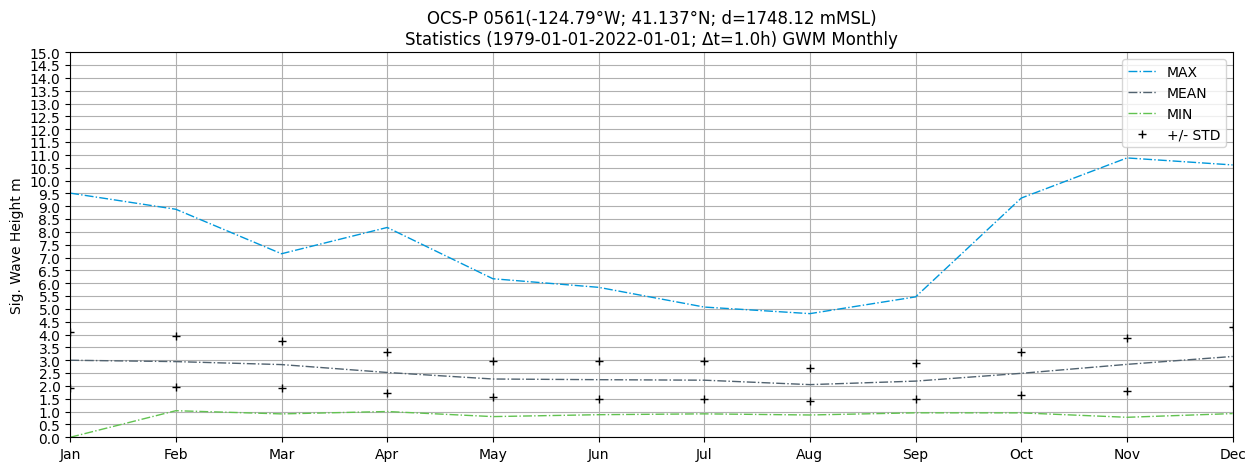

In [5]:
heading = " ".join([Hm0.name + Hm0.xyz_str]) + "\n" + " ".join(["Statistics", Hm0.ttt_str_long.replace("_", "-"), Hm0.legend, Hm0.group[-1]])

fig = plt.figure(0, figsize=(15, 5))
ax = fig.add_subplot()
ax.plot(stats.MAX[1:], color=Hm0.ColorOrder[1, :], linewidth=1, linestyle='-.')
ax.plot(stats.MEAN[1:], color=Hm0.ColorOrder[0, :], linewidth=1, linestyle='-.')
ax.plot(stats.MIN[1:], color=Hm0.ColorOrder[2, :], linewidth=1, linestyle='-.')
ax.plot(stats.MEAN[1:] + stats.STD[1:], color="black", marker="+", linestyle="none")
ax.plot(stats.MEAN[1:] - stats.STD[1:], color="black", marker="+", linestyle="none")
ax.set_title(heading, fontweight="normal")
ax.legend(["MAX", "MEAN", "MIN", "+/- STD"])
ax.set_xlim(0,len(Hm0.group)-2)
ax.set_ylabel(" ".join([Hm0.label, Hm0.unit]))
ax.set_ylim(Hm0.bins[0], Hm0.bins[-1])
ax.set_yticks(Hm0.bins)
ax.grid()
ax.set_xticks(np.arange(0, len(Hm0.group)-1,1))
ax.set_xticklabels(Hm0.title[1:])
